In [45]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
bus_stops_df = pd.read_csv('Stops_Cleaned/bus_stops.csv')
subway_stops_df = pd.read_csv('Stops_Cleaned/subway_stops.csv')
streetcar_stops_df = pd.read_csv('Stops_Cleaned/streetcar_stops.csv')
streets_cleaned = gpd.read_file('Road_Cleaned/roads_within_polygon.shp')

In [9]:
bus_stops_gdf = gpd.GeoDataFrame(bus_stops_df, geometry=gpd.points_from_xy(bus_stops_df.stop_lon, bus_stops_df.stop_lat), crs="EPSG: 4326")
subway_stops_gdf = gpd.GeoDataFrame(subway_stops_df, geometry=gpd.points_from_xy(subway_stops_df.stop_lon, subway_stops_df.stop_lat), crs="EPSG: 4326")
streetcar_stops_gdf = gpd.GeoDataFrame(streetcar_stops_df, geometry=gpd.points_from_xy(streetcar_stops_df.stop_lon, streetcar_stops_df.stop_lat), crs="EPSG: 4326")

### 1. How many transportation stops each road has? (Within Street)

First, I'd like to use nearest function to know the number of stops along the street

LINEARID is unique value, so I will use this as streets ID

In [5]:
streets_cleaned

LINEARID            FULLNAME RTTYP  MTFCC  \
0      1104485402227   State Rte 138 Spr     S  S1200   
1      1103775664930          Lee St Con     M  S1400   
2       110459068764  Tanners Church Con     M  S1400   
3       110459068765  Tanners Church Con     M  S1400   
4       110459064849   Old Rex Morrow Rd     M  S1400   
...              ...                 ...   ...    ...   
40364   110342521243         Overlake Ln     M  S1400   
40365   110342523635      County Line Rd     M  S1400   
40366   110342516783       State Rte 155     S  S1200   
40367   110342524606    Brassie Ridge Ln     M  S1400   
40368   110342519476           Summer Ln     M  S1400   

                                                geometry  
0      LINESTRING (-9390291.192 3965837.448, -9390556...  
1      LINESTRING (-9400663.274 3981737.760, -9400666...  
2      LINESTRING (-9385275.804 3979930.740, -9385280...  
3      LINESTRING (-9385496.550 3981091.485, -9385462...  
4      LINESTRING (-9388422.583 3973686.576, -9388223...  
...                                                  ...  
40364  LINESTRING (-9367430.733 3978783.348, -9367377...  
40365  LINESTRING (-9371335.932 3981387.940, -9371326...  
40366  LINESTRING (-9371051.065 3979117.179, -9371046...  
40367  LINESTRING (-9370705.863 3980267.947, -9370792...  
40368  LINESTRING (-9368689.867 3978217.582, -9368692...  

[40369 rows x 5 columns]

In [10]:
streets_cleaned = streets_cleaned.to_crs(epsg=3857)
bus_stops_gdf = bus_stops_gdf.to_crs(epsg=3857)
subway_stops_gdf = subway_stops_gdf.to_crs(epsg=3857)
streetcar_stops_gdf = streetcar_stops_gdf.to_crs(epsg=3857)

Offset streets and give them unique id (Right and Left) apply 0.1m

In [23]:
streets_cleanedR = streets_cleaned.copy()
streets_cleanedR['geometry'] = streets_cleanedR['geometry'].apply(lambda x: x.offset_curve(0.1))
streets_cleanedR['LINEARID'] = streets_cleanedR['LINEARID'].apply(lambda x: f"{x}R")
streets_cleanedR.head()

LINEARID            FULLNAME RTTYP  MTFCC  \
0  1104485402227R   State Rte 138 Spr     S  S1200   
1  1103775664930R          Lee St Con     M  S1400   
2   110459068764R  Tanners Church Con     M  S1400   
3   110459068765R  Tanners Church Con     M  S1400   
4   110459064849R   Old Rex Morrow Rd     M  S1400   

                                            geometry  
0  LINESTRING (-9390291.212 3965837.350, -9390556...  
1  LINESTRING (-9400663.188 3981737.710, -9400665...  
2  LINESTRING (-9385275.704 3979930.738, -9385280...  
3  LINESTRING (-9385496.456 3981091.519, -9385462...  
4  LINESTRING (-9388422.583 3973686.676, -9388223...

In [31]:
streets_cleanedL = streets_cleaned.copy()
streets_cleanedL['geometry'] = streets_cleanedL['geometry'].apply(lambda x: x.offset_curve(-0.1))
streets_cleanedL['LINEARID'] = streets_cleanedL['LINEARID'].apply(lambda x: f"{x}L")
streets_cleanedL.head()

LINEARID            FULLNAME RTTYP  MTFCC  \
0  1104485402227L   State Rte 138 Spr     S  S1200   
1  1103775664930L          Lee St Con     M  S1400   
2   110459068764L  Tanners Church Con     M  S1400   
3   110459068765L  Tanners Church Con     M  S1400   
4   110459064849L   Old Rex Morrow Rd     M  S1400   

                                            geometry  
0  LINESTRING (-9390291.171 3965837.545, -9390556...  
1  LINESTRING (-9400663.361 3981737.810, -9400666...  
2  LINESTRING (-9385275.904 3979930.742, -9385281...  
3  LINESTRING (-9385496.644 3981091.451, -9385462...  
4  LINESTRING (-9388422.583 3973686.476, -9388223...

In [29]:
offset_streets = pd.concat([streets_cleanedL, streets_cleanedR], ignore_index=True)
offset_streets = offset_streets.sort_values(by='FULLNAME', ascending=False)
offset_streets

LINEARID        FULLNAME RTTYP  MTFCC  \
30317   1103566441007L         Zoya Ct     M  S1400   
70686   1103566441007R         Zoya Ct     M  S1400   
48176    110166897773R  Zonolite Rd NE     M  S1400   
7807     110166897773L  Zonolite Rd NE     M  S1400   
48642    110166897771R  Zonolite Pl NE     M  S1400   
...                ...             ...   ...    ...   
80696    110458562402R            None  None  S1400   
80706  11012812949026R            None  None  S1750   
80709    110458562325R            None  None  S1400   
80715  11012812949530R            None  None  S1780   
80731    110342526728R            None  None  S1400   

                                                geometry  
30317  LINESTRING (-9412102.863 3983987.294, -9412083...  
70686  LINESTRING (-9412102.734 3983987.447, -9412083...  
48176  LINESTRING (-9389245.867 4002949.105, -9389088...  
7807   LINESTRING (-9389245.937 4002948.918, -9389088...  
48642  LINESTRING (-9388861.289 4002720.289, -9388718...  
...                                                  ...  
80696  LINESTRING (-9373821.867 4024119.938, -9373795...  
80706  LINESTRING (-9373030.351 4018696.810, -9373020...  
80709  LINESTRING (-9376551.718 4018316.478, -9376511...  
80715  LINESTRING (-9378821.217 4017243.317, -9378840...  
80731  LINESTRING (-9368488.168 3976909.017, -9368496...  

[80738 rows x 5 columns]

To make calculation faster, lets make buffer from busstops point and calculate for intersects

In [47]:
bus_stops_gdf2 = bus_stops_gdf.copy()

# 1. Create a 50m buffer around each bus stop point
bus_stops_gdf2['buffer'] = bus_stops_gdf2.geometry.buffer(100)

In [48]:
# 2. For each bus stop, calculate the nearest road within the buffer
def find_nearest_road(bus_stop):
    # Filter streets that intersect with the 50m buffer of the bus stop
    possible_streets = offset_streets[offset_streets.geometry.intersects(bus_stop['buffer'])]
    
    # If no streets are found within the buffer, return None
    if possible_streets.empty:
        return None
    
    # Find the street with the minimum distance to the bus stop geometry
    nearest_road_id = possible_streets.distance(bus_stop.geometry).idxmin()
    
    # Return the LINEARID of the nearest street
    return offset_streets.loc[nearest_road_id, 'LINEARID']

# 3. Add a new column 'nearest_road_id' containing the LINEARID of the nearest road for each bus stop
bus_stops_gdf2['nearest_road_id'] = bus_stops_gdf2.apply(find_nearest_road, axis=1)

# 4. Drop the buffer column if it's no longer needed
bus_stops_gdf2 = bus_stops_gdf2.drop(columns=['buffer'])

In [49]:
bus_stops_gdf3 = bus_stops_gdf2.drop(columns=['zone_id','location_type','parent_station','stop_timezone','route_type','stop_lon','stop_lat','stop_desc'])
bus_stops_gdf3.head()

stop_id  stop_code                      stop_name  stop_url  \
0      355     906311    HOWELL MILL RD @ KIPLING DR       NaN   
1     9008     902632  N MAIN ST @ WINTHROPE PARK DR       NaN   
2     9012     902630                N MAIN ST @ 379       NaN   
3     9016     902631                N MAIN ST @ 301       NaN   
4     9020     900005      N MAIN ST @ PINE GROVE DR       NaN   

   wheelchair_boarding station_type                          geometry  \
0                  1.0          Bus  POINT (-9397009.657 4003792.399)   
1                  1.0          Bus  POINT (-9383589.425 4040825.358)   
2                  1.0          Bus  POINT (-9383671.690 4040332.191)   
3                  1.0          Bus  POINT (-9383649.203 4040067.941)   
4                  1.0          Bus  POINT (-9383632.728 4039857.191)   

  nearest_road_id  
0  1101019336468R  
1  1101019200907L  
2  1101019200907L  
3  1101019200907L  
4  1101019200907L

There are some NA value...

In [51]:
none_count = bus_stops_gdf3['nearest_road_id'].isna().sum()
none_count

94

### Let's Check if I did well

Ok. It seems some NA values are came from boundary problems. Need to fix boundary (Maybe more bigger)

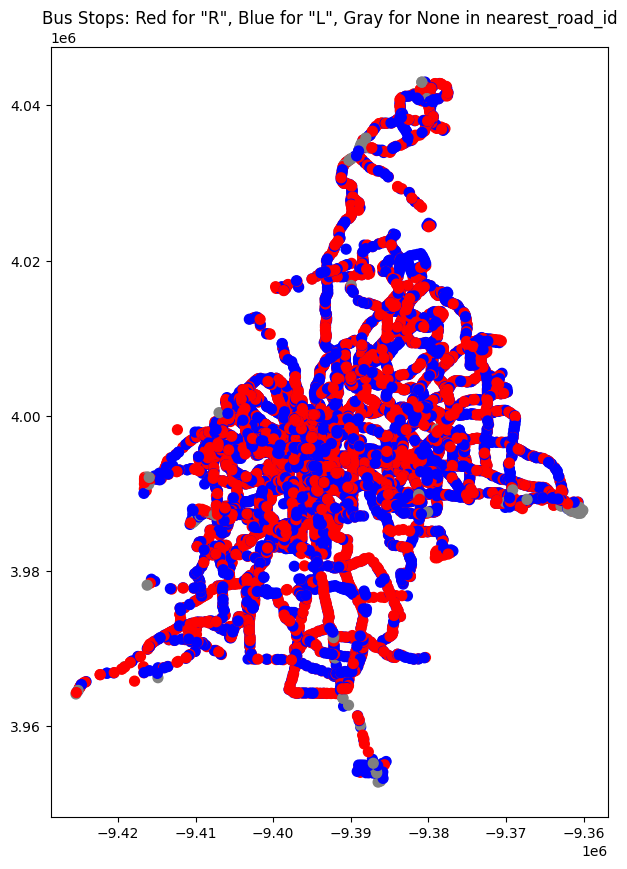

In [52]:
bus_stops_gdf3['color'] = bus_stops_gdf3['nearest_road_id'].apply(
    lambda x: 'red' if isinstance(x, str) and x.endswith('R') else ('blue' if isinstance(x, str) and x.endswith('L') else 'gray')
)

fig, ax = plt.subplots(figsize=(10, 10))

bus_stops_gdf3.plot(ax=ax, color=bus_stops_gdf3['color'], markersize=50, legend=True)

plt.title('Bus Stops: Red for "R", Blue for "L", Gray for None in nearest_road_id')
plt.show()

In [53]:
bus_stops_gdf3.explore(
    color=bus_stops_gdf3['color'],  # Use the color column for coloring the points
    tooltip=['stop_id', 'stop_name', 'nearest_road_id'],  # Display relevant info when hovering
    marker_kwds={'radius': 5}  # Adjust marker size
)

Let's count busstops for each streets

In [54]:
bus_stop_counts = bus_stops_gdf3.groupby('nearest_road_id').size().reset_index(name='bus_stops_count')
bus_stop_counts.sort_values(by='bus_stops_count', ascending=False)

nearest_road_id  bus_stops_count
2303   1106087294548L               54
2304   1106087294548R               53
1125    110166805868L               53
1866  11032818450498R               50
1092  11015504024552L               48
...               ...              ...
1071   1101019358142L                1
1069   1101019357725L                1
1068   1101019357586L                1
1067   1101019357503L                1
2443   1109097286861L                1

[2444 rows x 2 columns]

Be patient! Weird number is from super long ways!

Gonna Split Roads and rerun

In [60]:
filtered_rows = offset_streets[offset_streets['LINEARID'].isin(['1106087294548L', '110166805868L'])]
filtered_rows

LINEARID       FULLNAME RTTYP  MTFCC  \
14507  1106087294548L     US Hwy 278     U  S1200   
14546   110166805868L  State Rte 260     S  S1200   

                                                geometry  
14507  LINESTRING (-9389633.940 3998479.799, -9389600...  
14546  LINESTRING (-9389715.460 3993967.978, -9389702...

In [61]:
filtered_rows.explore()